# Global trends in dietary components

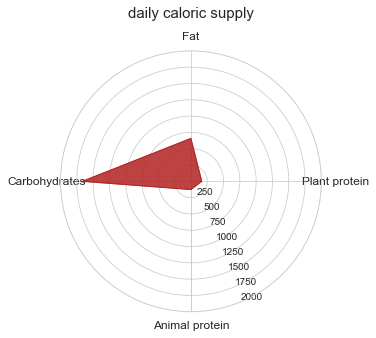

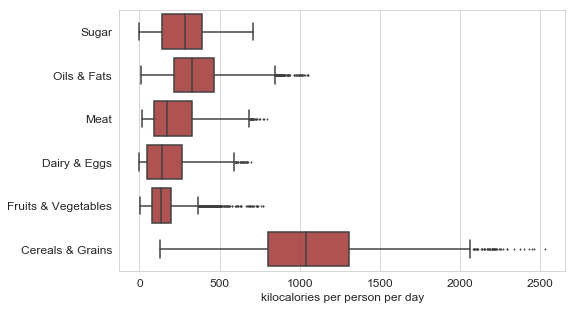

fruit-consumption-per-capita.csv


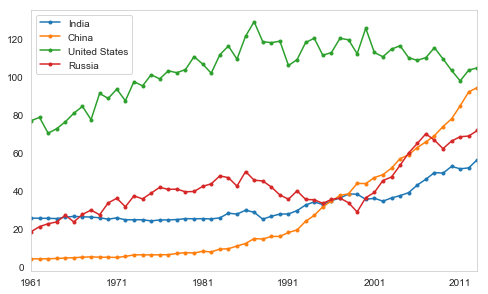

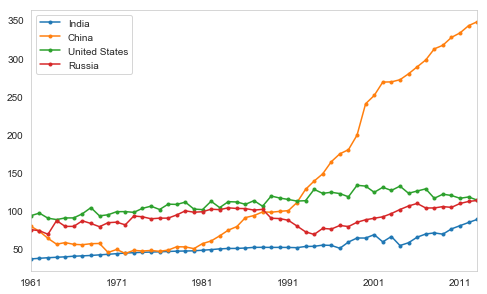

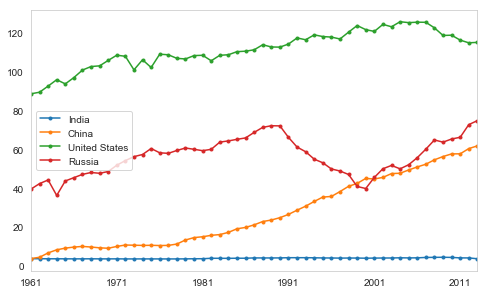

0

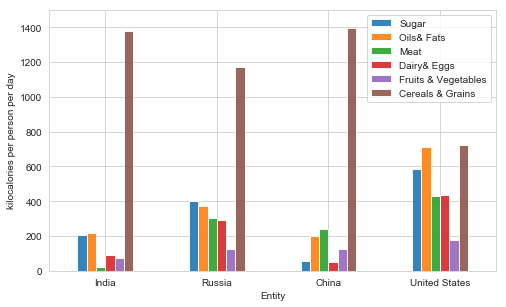

In [19]:
'''
group 17: Liang Tao, Ke Liu, Chenfeng Wu, Sihan Wang
Project name: Global trends in dietary components
Abstract: visualize the global food trends and analyze according to different countries and years
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class Visualization:
    def __init__(self):
        self._color = 'firebrick'
        self._transparency = 0.85
        self._fontsize = 12
        
    def radarChart_for_macronutrient(self,macronutrient):
        '''
        macronutrient: csv file which include attributes: carbohydrates, animal/plant protein, fat
        compute the mean of daily macronutrient intake and plot a radar chart to represent the four nutrients
        '''
        df=pd.read_csv(macronutrient)
        name = ['Animal protein','Plant protein','Fat','Carbohydrates']   #labels
        theta = np.linspace(0,2*np.pi,len(name),endpoint=False)    #divide the circle to uniform part
        value = [df[i].mean() for i in df.columns[3:]]             # mean kilocalories in different macronutrient
        theta = np.concatenate((theta,[theta[0]]))                 #close
        value = np.concatenate((value,[value[0]]))                 #close the circle

        ax = plt.subplot(111,projection = 'polar')      
        ax.plot(theta,value,lw=1,alpha = 0.75,color=self._color)   
        ax.fill(theta,value,color='firebrick',alpha = self._transparency)       #fill, alpha is transparency
        ax.set_thetagrids(theta*180/np.pi,name,fontsize=self._fontsize)         #label
        ax.set_ylim(0,2000)                                                     #set polar axis length
        ax.set_theta_zero_location('S')                                         #set polar axis direction
        ax.set_title('daily caloric supply',fontsize = 15,pad=20.0)             #description of plot
        plt.savefig('daily caloric supply.pdf',bbox_inches='tight')             #save plot
        plt.show()
        return 0
    
    def boxPlot_for_dailyCaloricSupply(self,foodGroup):
        '''
        foodGroup: Sugar, Oils, fats...
        extract the main food groups from file and plot a box plot to \
        show the distribution of daily caloric supply of different food groups
        '''
        df=pd.read_csv(foodGroup)
        new_df = df.loc[:,['Sugar (kilocalories per person per day)','Oils & Fats (kilocalories per person per day)','Meat (kilocalories per person per day)','Dairy & Eggs (kilocalories per person per day)','Fruits & Vegetables (kilocalories per person per day)','Cereals & Grains (kilocalories per person per day)']]
        sns.set_style("whitegrid")                 # add grid
        ax = sns.boxplot(data=new_df,orient="h",width=0.8,palette=[self._color]*6,fliersize=1) 
        for patch in ax.artists:                   # change transparency
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, self._transparency))
        ax.tick_params(axis='x',labelsize=self._fontsize)
        plt.rcParams["figure.figsize"] = [12, 4.8]
        ax.set_yticklabels(labels=['Sugar','Oils & Fats','Meat','Dairy & Eggs','Fruits & Vegetables','Cereals & Grains'],fontsize=self._fontsize)
        plt.xlabel('kilocalories per person per day',fontsize=self._fontsize)
        plt.savefig('box2.pdf',bbox_inches='tight')
        plt.show()
        return 0
    
    def lineChart_for_fruit_vegetable_meat_intake(self,files):
        '''
        read three files: fruit, vegetable, meat intake for 200+ countries from 1961 to 2013
        plot a line chart to compare the value of fruit/vegetable/meat intake(kg/capita/yr) from 1961 to 2013 of four countries
        '''
        countries = ['India','Russia', 'China','United States']
        plt.rcParams["figure.figsize"] = [8, 4.8]
        year = []        # set xticks
        for i in range(1961,2014,10):
            year.append(i)
          
        for i in files:
            df=pd.read_csv(i)
            if i==fruit:
                print(i)
                col_name = ' (kilograms per person)'
            elif i==vegetable:
                col_name = 'Food Balance Sheets: Vegetables - Food supply quantity (kg/capita/yr) (FAO (2017)) (kg)'
            else:
                col_name = 'Value'
            
            if i==meat:
                y1 = df[df.Country=='India']
                y2 = df[df.Country=='China']
                y3=df[df.Country=='United States of America']
                y4=df[df.Country=='Russian Federation']
                y5=df[df.Country=='USSR']
            else:
                y1 = df[df.Entity=='India']
                y2 = df[df.Entity=='China']
                y3=df[df.Entity=='United States']
                y4=df[df.Entity=='Russia']   # Russia data is divided into two parts at year 1992
                y5=df[df.Entity=='USSR']
            
            y6 = list(y5[col_name])+list(y4[col_name])
            
            plt.clf()
            plt.plot(range(1961,2014),list(y1[col_name]),marker='.',label='India')
            plt.plot(range(1961,2014),list(y2[col_name]),marker='.',label='China')
            plt.plot(range(1961,2014),list(y3[col_name]),marker='.',label='United States')
            plt.plot(range(1961,2014),y6,marker='.',label='Russia')
            plt.legend(loc='best')
            plt.xticks(year) 
            plt.xlim(1961, 2013)
            plt.grid()
            plt.savefig('line_{}.pdf'.format(i),bbox_inches='tight')
            plt.show()
            
        return 0
    
    def barPlot_dietary_component_for_four_countries(self,diet):
        '''
        compare the main food group intake of four countries
        compute the mean intake for 6 food groups and take out four countries for further analysis
        '''
        df=pd.read_csv(diet)
        grp = df.groupby('Entity')
        res=grp.mean()
        countries = ['India','Russia', 'China','United States']
        new_df=res.loc[countries,:]
        new_df = new_df.loc[:,['Sugar (kilocalories per person per day)','Oils & Fats (kilocalories per person per day)','Meat (kilocalories per person per day)','Dairy & Eggs (kilocalories per person per day)','Fruits & Vegetables (kilocalories per person per day)','Cereals & Grains (kilocalories per person per day)']]
        
        ax=new_df.plot.bar(stacked=False, alpha=0.9)
        ax.set(ylim=[0, 1500])
        plt.xticks(x=countries, rotation=0)
        ax.legend(['Sugar','Oils& Fats','Meat','Dairy& Eggs','Fruits & Vegetables','Cereals & Grains'])
        plt.ylabel('kilocalories per person per day')
        plt.savefig('kilocalories per person per day2.pdf',bbox_inches='tight')
        return 0
## files we need
macronutrient='daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv'
foodGroup='dietary-compositions-by-commodity-group.csv'
fruit='fruit-consumption-per-capita.csv'
vegetable='vegetable-consumption-per-capita.csv'
meat='FAOSTAT_data_3-10-2019.csv'
diet='dietary-compositions-by-commodity-group.csv'
vis = Visualization()     # an instance
vis.radarChart_for_macronutrient(macronutrient)
vis.boxPlot_for_dailyCaloricSupply(foodGroup)
vis.lineChart_for_fruit_vegetable_meat_intake([fruit,vegetable,meat])
vis.barPlot_dietary_component_for_four_countries(diet)

In [ ]:
tt = []